### Imports

In [1]:
class PtsList(object):
    pass

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from pymooCFD.setupOpt import *

[Errno 17] File exists: 'dump'
[Errno 17] File exists: 'archive'
[Errno 17] File exists: './plots'
[Errno 17] File exists: './plots/mapGen'


In [3]:
checkpointDir = './dump/checkpoint.npy'
plotDir = './plots'

#### Create Directory for Saving Plots

In [4]:
try: 
    os.mkdir(plotDir)
except OSError as err:
    print(err)

[Errno 17] File exists: './plots'


#### Load Data from .npy Checkpoint

In [5]:
checkpoint, = np.load(checkpointDir, allow_pickle=True).flatten()
algorithm = checkpoint

print('Number of individuals in final population: ' + str(len(algorithm.pop.get('X'))))
print('Number of generations: ', str(algorithm.n_gen), str(len(algorithm.callback.data['var'])), str(len(algorithm.callback.data['obj'])))

Number of individuals in final population: 100
Number of generations:  200 200 200


### Optimization Convergence

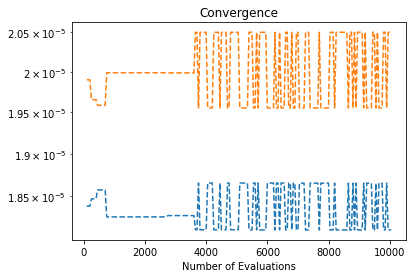

In [6]:
plt.title("Convergence")
# print(algorithm.callback.n_evals)
# print(algorithm.callback.opt)
plt.plot(algorithm.callback.n_evals, algorithm.callback.opt, "--")
plt.xlabel("Number of Evaluations")
plt.ylabel("")
plt.yscale("log")
plt.show()

### Print Final Generation 

In [7]:
if len(algorithm.pop.get('X')) < 20:
    print('FINAL POPULATION')
    print('Parameters')
    print(algorithm.pop.get('X'))
    print('Objectives')
    print(algorithm.pop.get('F'))

### Print Every Generation

In [8]:
if algorithm.n_gen < 10 and len(algorithm.pop.get('X')) < 10:
    print('EVERY GENERATION')
    for gen in range(algorithm.n_gen):
        print(f'generation {gen}')
        var_g = algorithm.callback.data['var'][gen]
        obj_g = algorithm.callback.data['obj'][gen]
        for ind in range(len(var_g)):
            var_i = var_g[ind]
            obj_i = obj_g[ind]
            print(f'ind{ind}: ', end='')
            for n in range(len(var_i)):
                print(f'{var_labels[n]}: {var_i[n]}', end=' ')
            print(' // ', end='')
            for n in range(len(obj_i)):
                print(obj_labels[n] + ':' + '%.3f' % obj_i[n], end=' ')
            print()

In [9]:
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
# img = mpimg.imread('dump/gen.png')
# imgplot = plt.imshow(img)
# plt.show()

## Scatter Plots

In [10]:
from pymoo.visualization.scatter import Scatter

### All Design Points

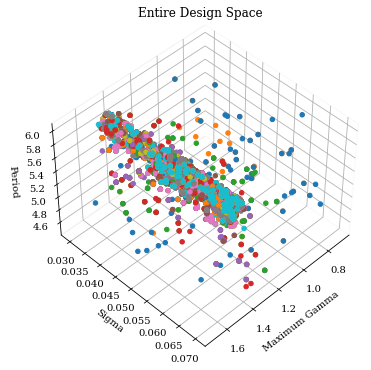

In [12]:
if n_var > 3: # plot without labels
    print('CAN NOT REPRESENT DESIGN SPACE IN 3D. USING ')
    plot = Scatter()
    plot.add(algorithm.pop.get('X')[:10])

# All design points
else: 
    if algorithm.n_gen < 15:
        leg = True
    else:
        leg = False
    plot = Scatter(title='Entire Design Space', legend=leg, labels=var_labels)
    for g in range(len(algorithm.callback.data['var'])):  # range(algorithm.n_gen)
        plot.add(algorithm.callback.data['var'][g][:], label='GEN %i' % g)

# save plot to png file
plot.save(plotDir + '/entire_design_space.png')
plot.show()

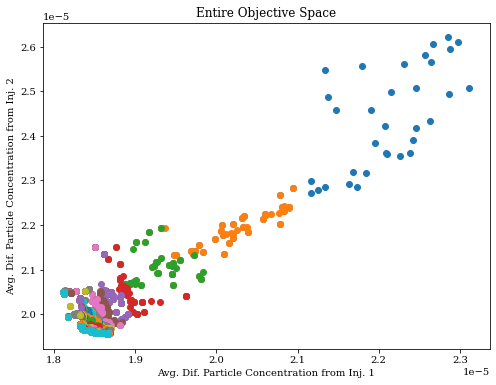

In [13]:
# All objective points
if algorithm.n_gen < 15:
    leg = True
else:
    leg = False
plot = Scatter(title='Entire Objective Space', legend=leg, labels=obj_labels)
for g in range(len(algorithm.callback.data['var'])):
    plot.add(algorithm.callback.data['obj'][g][:], label='GEN %i' % g)
# if pf is not None:
#     plot.add(pf, plot_type="line", color="black", alpha=0.7)
plot.save(plotDir + '/entire_obj_space.png')
plot.show()

### Last 10 Generation of Parameter Space

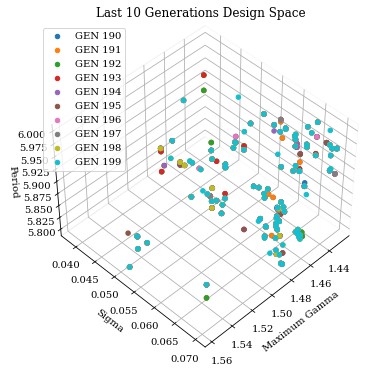

In [14]:
# Last 10 generations
# last 10 gens. design points
if algorithm.n_gen > 10:
    #### Design Space ####
    if n_var > 3: # plot without labels
        print('CAN NOT REPRESENT OBJECTIVE SPACE IN 3D. Using Pairwise Scatter Plots')
        plot = Scatter(figsize=(10, 8))
        plot.add(algorithm.pop.get('X')[:10])
    # Last 10 generations of objective points
    else: 
        plot = Scatter(title='Last 10 Generations Design Space', legend=True, labels=var_labels)
        for g in range(algorithm.n_gen-10, algorithm.n_gen):  # algorithm.n_gen == len(algorithm.callback.data['var'])
            plot.add(algorithm.callback.data['var'][g][:], label='GEN %i' % g)
    # save design space plot
    plot.save(plotDir + '/final_10_design_space.png')
    plot.show()

### Last 10 Generation of Objective Space

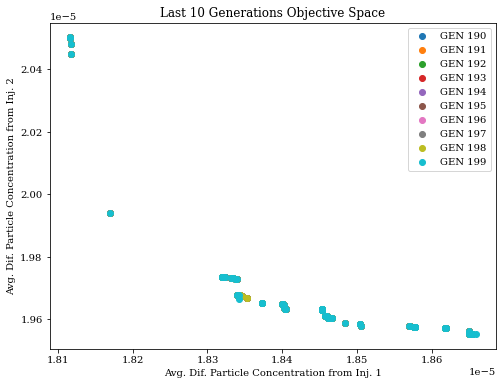

In [15]:
### Objective Space ####
if algorithm.n_gen > 10:
    if n_obj >3:
        plot = Scatter()
        plot.add(algorithm.pop.get('F')[:10])
    else:
        # last 10 gens. objective points
        plot = Scatter(title='Last 10 Generations Objective Space', legend=True, labels=obj_labels)
        for g in range(len(algorithm.callback.data['obj'])-10, len(algorithm.callback.data['obj'])):  # range(algorithm.n_gen)
            plot.add(algorithm.callback.data['obj'][g][:], label='GEN %i' % g)#, facecolor='none')

    # save objective space plot
    plot.save(plotDir + '/final_10_obj_space.png')
    plot.show()

#### Decision Making 

In [16]:
# if pf is not None:
#     from pymoo.factory import get_decision_making

#     dm = get_decision_making("high-tradeoff")

#     I = dm.do(pf)

#     plot = Scatter(title='Pareto Front: High Tradeoff Points')
#     plot.add(pf, alpha=0.2)
#     plot.add(pf[I], color="red", s=100)
#     plot.save(plotDir + '/pf-high-tradeoff')

### Running Metric

In [17]:
# from pymoo.util.running_metric import RunningMetric

# running = RunningMetric(
#                         delta_gen=5,
#                         # n_plots=4,
#                         only_if_n_plots=True,
#                         key_press=False,
#                         do_show=True)

# running.notify(algorithm)

### Best of Objectives 

In [18]:
for obj in range(n_obj):
    ind = np.argmin(algorithm.pop.get('F')[obj].min())
    print(f'Objective - {obj_labels[obj]}: {algorithm.pop.get("F")[obj].min()}, ')
    print(f'      Individual {ind+1} - ', end='')
    for var in range(n_var):
          print(f'{var_labels[var]}: {algorithm.pop.get("X")[ind][var]}, ', end='')
    print()

Objective - Avg. Dif. Particle Concentration from Inj. 1: 1.8115921787425787e-05, 
      Individual 1 - Maximum Gamma: 1.5537979449612171, Sigma: 0.052925854498357676, Period: 5.844570408122444, 
Objective - Avg. Dif. Particle Concentration from Inj. 2: 1.865417995979505e-05, 
      Individual 1 - Maximum Gamma: 1.5537979449612171, Sigma: 0.052925854498357676, Period: 5.844570408122444, 


In [19]:
for obj in range(n_obj):
    ind = np.argmin(algorithm.pop.get('F')[obj].min())
    print(f'Objective - {obj_labels[obj]}: {algorithm.pop.get("F")[obj].min()}, ')
    print(f'      Individual {ind+1} - ', end='')
    print(algorithm.pop.get("X")[ind], end='')
    print()

Objective - Avg. Dif. Particle Concentration from Inj. 1: 1.8115921787425787e-05, 
      Individual 1 - [1.5537979449612171 0.052925854498357676 5.844570408122444]
Objective - Avg. Dif. Particle Concentration from Inj. 2: 1.865417995979505e-05, 
      Individual 1 - [1.5537979449612171 0.052925854498357676 5.844570408122444]


In [20]:
algorithm.pop.get('X')[0]

array([1.5537979449612171, 0.052925854498357676, 5.844570408122444],
      dtype=object)

In [21]:
algorithm.pop.get('F')[0]

array([1.81159218e-05, 2.05019565e-05])

### Best Individuals Display Data 

Genetic algoithm should store the best individuals at the beginning of the latest population. 

In [22]:
# how many individuals at beginning of population you want to look at 
# ind_max = int(algorithm.pop_size * (1/4)) # look at a fraction of the population
ind_max = 10
# make sure max_ind does not exceed population size
if ind_max > algorithm.pop_size:
    print('ind_max greater than population size')
    ind_max = algorithm.pop_size

Individual 1 - Maximum Gamma: 1.4566082863108858, Sigma: 0.06785273746120735, Period: 5.949391482347828, 
Entities in individual 1 directory [dump/gen199/ind1]: 
     tracers_all.npy
     plt.png
     meanC-cva.npy
     var.txt
     obj.txt


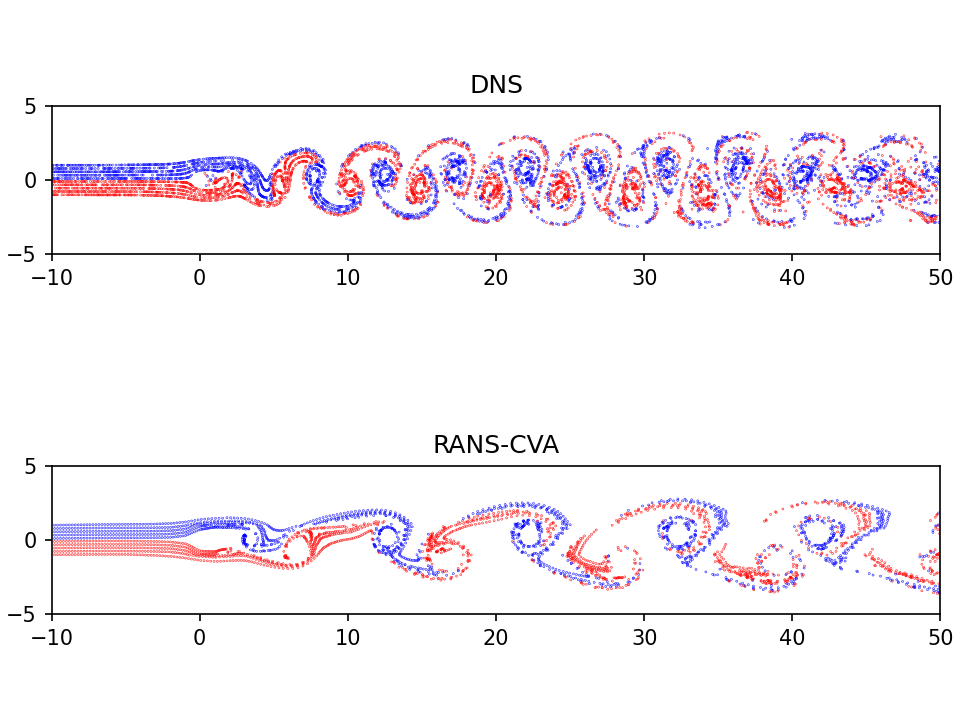


Individual 2 - Maximum Gamma: 1.557105701050101, Sigma: 0.05149850084074795, Period: 5.8015933461402796, 
Entities in individual 2 directory [dump/gen199/ind2]: 
     tracers_all.npy
     plt.png
     meanC-cva.npy
     var.txt
     obj.txt


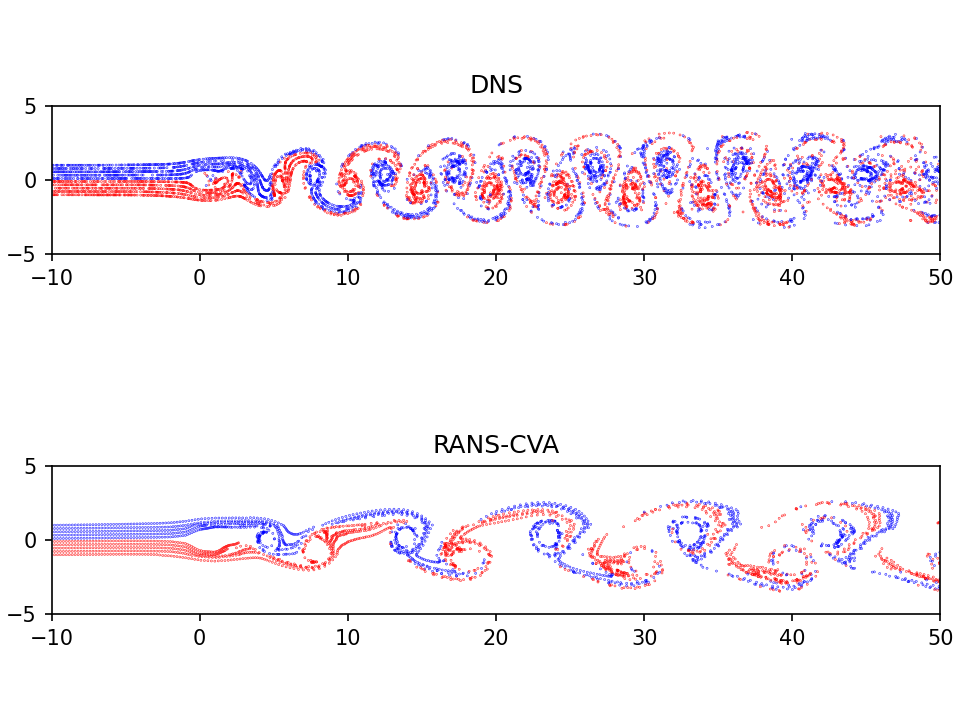


Individual 3 - Maximum Gamma: 1.5536265389812751, Sigma: 0.06947318269731438, Period: 5.877112969529485, 
Entities in individual 3 directory [dump/gen199/ind3]: 
     tracers_all.npy
     plt.png
     meanC-cva.npy
     var.txt
     obj.txt


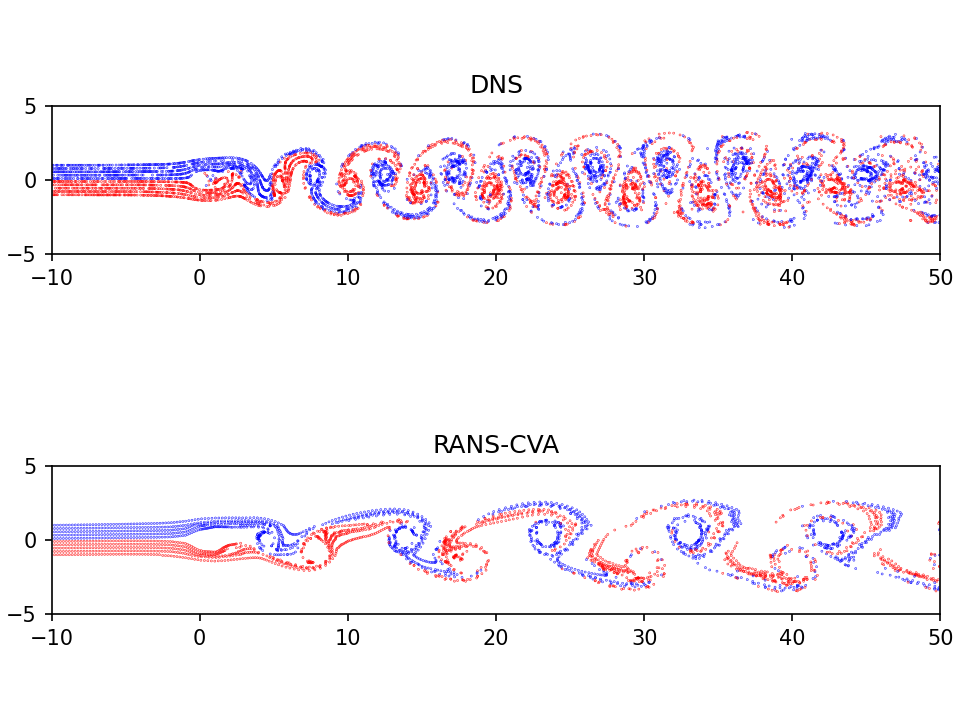


Individual 4 - Maximum Gamma: 1.4790422824588099, Sigma: 0.06799755569188674, Period: 5.877526450266648, 
Entities in individual 4 directory [dump/gen199/ind4]: 
     tracers_all.npy
     plt.png
     meanC-cva.npy
     var.txt
     obj.txt


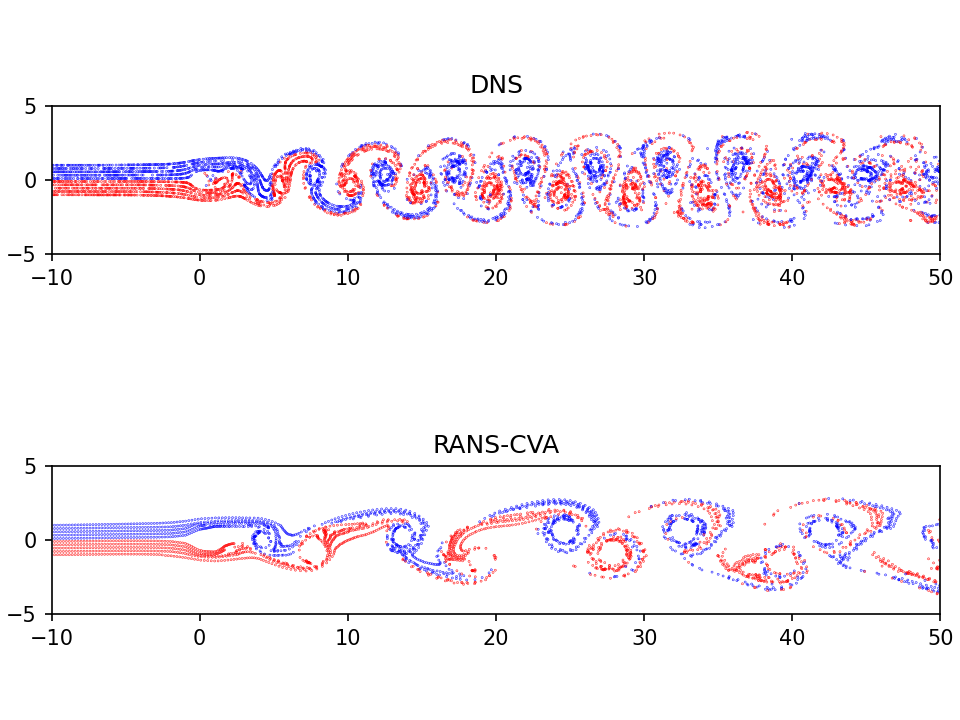


Individual 5 - Maximum Gamma: 1.4282649649964994, Sigma: 0.06999971413672247, Period: 5.966381685347889, 
Entities in individual 5 directory [dump/gen199/ind5]: 
     tracers_all.npy
     plt.png
     meanC-cva.npy
     var.txt
     obj.txt


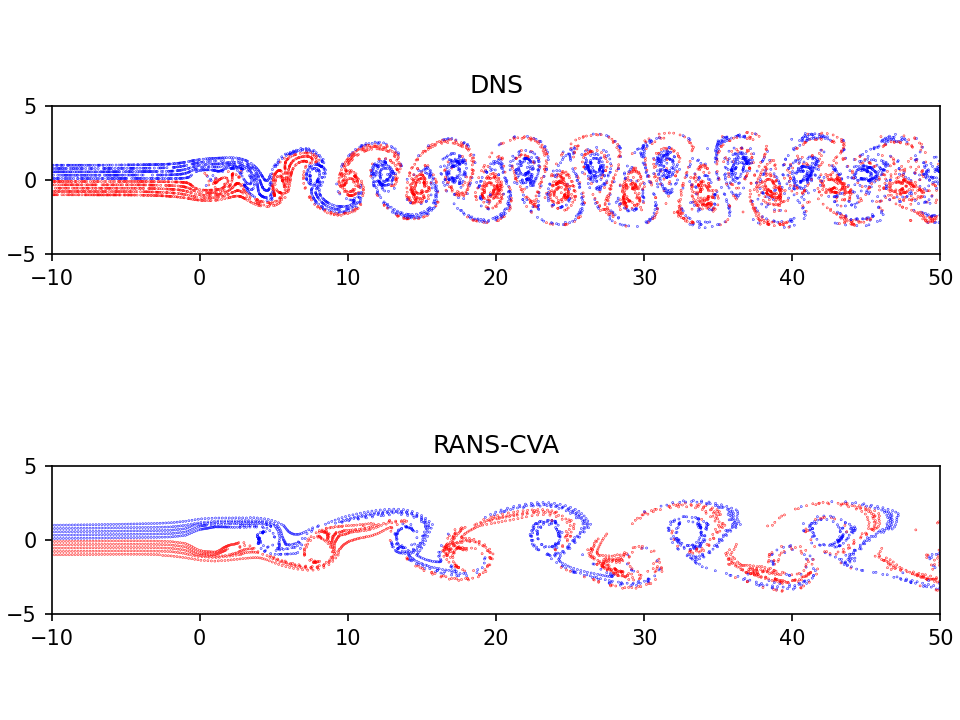


Individual 6 - Maximum Gamma: 1.454821199371069, Sigma: 0.0604327151778399, Period: 5.866183183973139, 
Entities in individual 6 directory [dump/gen199/ind6]: 
     tracers_all.npy
     plt.png
     meanC-cva.npy
     var.txt
     obj.txt


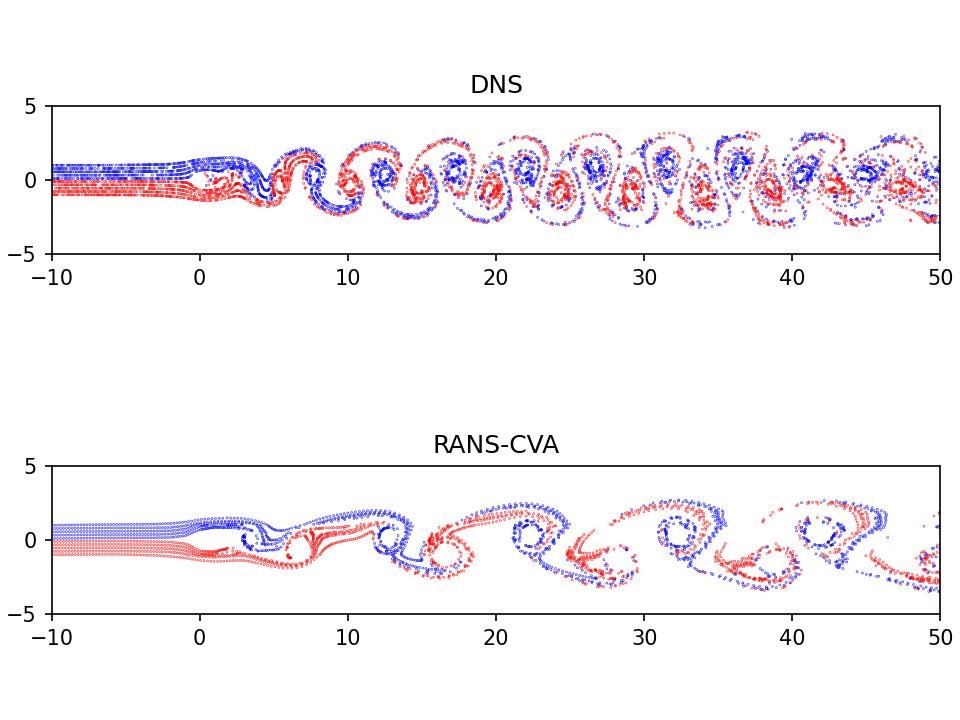


Individual 7 - Maximum Gamma: 1.4682385933674162, Sigma: 0.052632836111653945, Period: 5.805534695886754, 
Entities in individual 7 directory [dump/gen199/ind7]: 
     tracers_all.npy
     plt.png
     meanC-cva.npy
     var.txt
     obj.txt


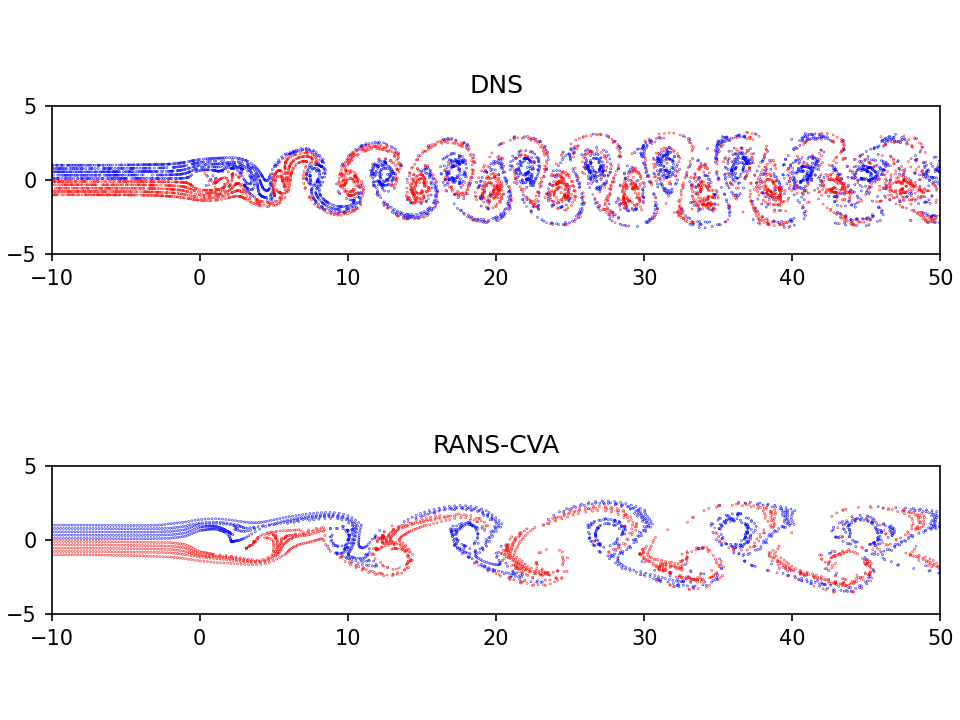


Individual 8 - Maximum Gamma: 1.470494891842497, Sigma: 0.06790855066232233, Period: 5.887901555467928, 
Entities in individual 8 directory [dump/gen199/ind8]: 
     tracers_all.npy
     plt.png
     meanC-cva.npy
     var.txt
     obj.txt


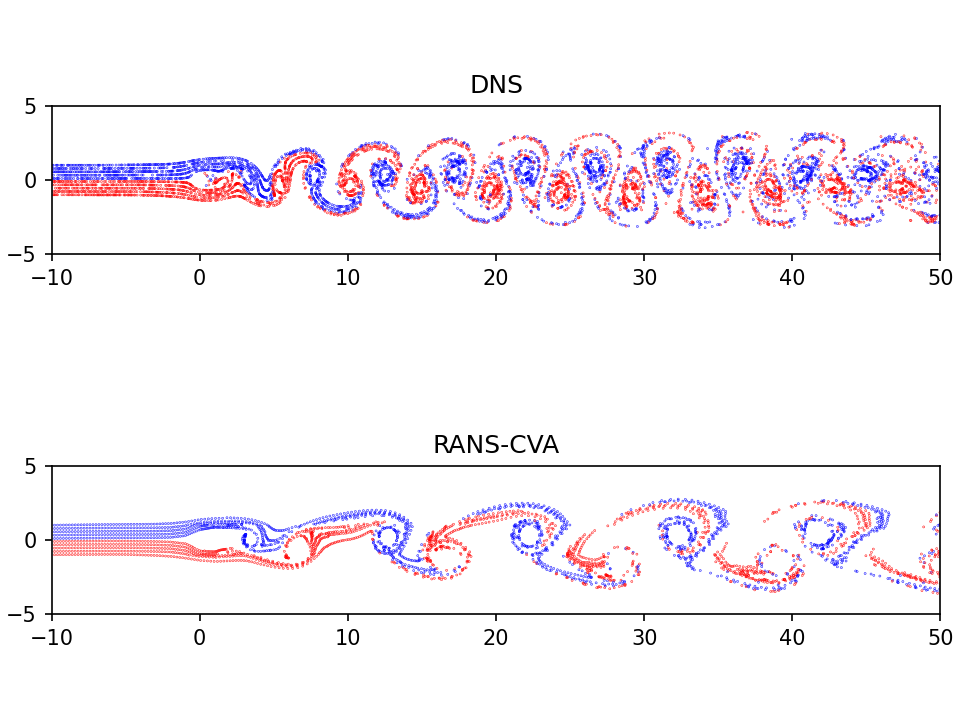


Individual 9 - Maximum Gamma: 1.4285110458644514, Sigma: 0.06999971413672247, Period: 5.966381685347889, 
Entities in individual 9 directory [dump/gen199/ind9]: 
     tracers_all.npy
     plt.png
     meanC-cva.npy
     var.txt
     obj.txt


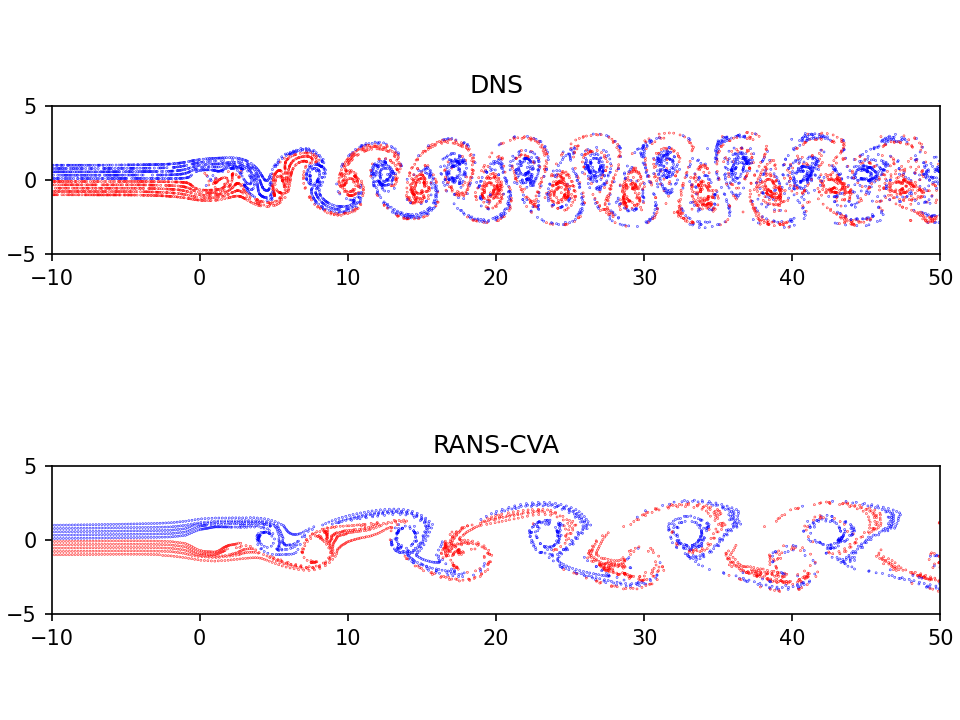

In [28]:
### Open latest generation folder ###
gen = algorithm.n_gen - 1
genDir = os.path.join(dataDir, f'gen{gen}')
for ind in range(1, ind_max):
    indDir = os.path.join(genDir, f'ind{ind}')
    ind_x = algorithm.pop.get('X')[ind]
    print(f'Individual {ind} - ', end='')
    for var in range(n_var):
          print(f'{var_labels[var]}: {algorithm.pop.get("X")[ind][var]}, ', end='')
    print()
    print(f'Entities in individual {ind} directory [{indDir}]: ')
    ents = os.listdir(indDir)
    for ent in ents:
        print(f'     {ent}')
    ### DISPLAY DATA FROM INDIVIDUAL'S DIRECTORY ###
    # EXAMPLE: dislay PNG 
    from IPython.display import Image, display
    fn = os.path.join(indDir, 'plt.png')
    display(Image(filename=fn))
    
    print()

In [ ]:
from pymooCFD.setupCFD import runCFD

#### Run Individual 1

In [ ]:
ind1 = [algorithm.pop.get('X')[0][i] for i in range(len(algorithm.pop.get('X')[0]))]
ind1.append(0)
ind1.append(0)
runCFD(ind1)

#### Run Individuals 1-10

In [ ]:
if len(algorithm.pop.get('X')) >= 10:
    for i, ind_x in enumerate(algorithm.pop.get('X')[:10]):
        ind = [ind_x[j] for j in range(len(ind_x))]
        # append individual number
        ind.append(i)
        # append generation number
        ind.append(0)
        runCFD(ind)

### Archive Previous Optimization Study Data

In [ ]:
# from pymooCFD.util.handleData import archive 
# archive('dump', background=False)